In [11]:
import pandas as pd
import numpy as np

import sys
sys.path.insert(0, '../SOM-LVQ')
from minisom import MiniSom
import LVQ
from supervisedSom import supervisedSom
from SOM_LVQ import SOM_LVQ

In [12]:
data = pd.read_csv(r"../data/rocktype.csv")
x = data.iloc[:, 0:6].values
y = data.iloc[:, 6].values
y[y==4] = 0
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=44)

# use Minmaxscaler because we use euclidean distance
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
x_train = minmax.fit_transform(x_train)
x_test = minmax.transform(x_test)

In [13]:
x_train.shape

(1479, 6)

In [14]:
som1 = MiniSom(x = 25, y = 25, input_len = 6, sigma = 1.0, learning_rate = 0.5)
som1.random_weights_init(x_train)
som1.train_random(data = x_train, num_iteration = 100)

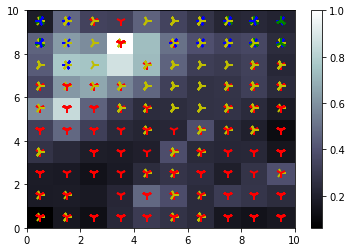

In [15]:
suso1 = supervisedSom(som1, x_train, y_train)

label1= suso1.visualSom()

In [16]:
propa1 = suso1.propabilitySom()

taggings1 = suso1.taggingSom()

In [17]:
predicted_y1 = [suso1.predict(instance) for instance in x_test]

from sklearn.metrics import classification_report

print (classification_report(y_test, predicted_y1, target_names=['0','1', '2', '3']))

             precision    recall  f1-score   support

          0       0.85      0.95      0.90       229
          1       0.68      0.76      0.72        63
          2       0.50      0.52      0.51        33
          3       0.80      0.62      0.70       168

avg / total       0.79      0.79      0.78       493



In [18]:
taggings1

array([[0., 0., 0., 0., 0., 0., 3., 3., 2., 2.],
       [0., 0., 0., 2., 0., 0., 0., 2., 2., 3.],
       [0., 2., 0., 0., 0., 0., 3., 3., 3., 3.],
       [0., 0., 0., 0., 0., 3., 3., 2., 0., 0.],
       [0., 0., 3., 0., 3., 3., 3., 3., 2., 3.],
       [0., 0., 0., 3., 0., 3., 3., 3., 3., 3.],
       [0., 3., 0., 0., 3., 3., 3., 3., 2., 3.],
       [0., 0., 0., 0., 0., 0., 3., 3., 3., 1.],
       [0., 0., 0., 0., 0., 0., 0., 3., 1., 1.],
       [0., 0., 3., 0., 0., 0., 0., 3., 3., 1.]])

In [19]:
label1

array([[[  9.,   6.,  10.,   2.,  23.,   2.,   3.,   0.,   0.,   0.],
        [  5.,   7.,   2.,   0.,  16.,  46.,   8.,   0.,   0.,   0.],
        [  6.,   0.,   5.,   8.,   9.,  24.,   5.,   0.,   0.,   4.],
        [ 25.,   2.,   2.,   3.,   2.,   1.,   1.,   0.,  76.,   1.],
        [ 10.,   9.,   4.,   1.,   5.,   1.,   0.,   1.,   0.,   0.],
        [  6.,   5.,   8.,   2.,   1.,   0.,   0.,   0.,   1.,   0.],
        [  7.,   2.,  19.,   7.,   1.,   0.,   0.,   0.,   0.,   0.],
        [  9.,  21.,   4.,   3.,  11.,   5.,   1.,   0.,   0.,   0.],
        [ 10.,   6.,   1.,   3.,   2.,  22.,   7.,   1.,   0.,   0.],
        [ 80.,  18.,   1.,  14.,  10.,  20.,   7.,   1.,   0.,   0.]],

       [[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  18.,   2.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0

In [149]:
data_new = pd.read_csv(r"../data/SD-3X_rocktype.csv")
x_new = data_new.iloc[:, 0:6].values
y_new = data_new.iloc[:, 6].values
y_new[y_new == 4] = 0
x_new = minmax.fit_transform(x_new)
predicted_y_new = [suso1.predict(instance) for instance in x_new]

from sklearn.metrics import classification_report

print (classification_report(y_new, predicted_y_new, target_names=['0', '1', '2', '3']))

             precision    recall  f1-score   support

          0       0.92      0.68      0.78       331
          1       0.98      0.89      0.93        95
          2       0.50      0.81      0.62        26
          3       0.61      0.83      0.70       205

avg / total       0.81      0.77      0.77       657



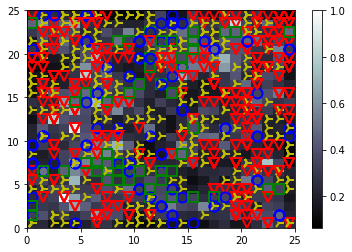

In [150]:
som2 = MiniSom(x = 25, y = 25, input_len = 6, sigma = 1.0, learning_rate = 0.5)
som2.random_weights_init(x_train)
som2.train_random(data = x_train, num_iteration = 100)
suso2 = supervisedSom(som2, x_train, y_train)

label2= suso2.visualSom()

In [151]:
propa2 = suso2.propabilitySom()

taggings2 = suso2.taggingSom()

In [152]:
predicted_y2 = [suso2.predict(instance) for instance in x_test]

from sklearn.metrics import classification_report

print (classification_report(y_test, predicted_y2, target_names=['0','1', '2', '3']))

             precision    recall  f1-score   support

          0       0.94      0.94      0.94       229
          1       0.85      0.84      0.85        63
          2       0.39      0.45      0.42        33
          3       0.86      0.85      0.85       168

avg / total       0.87      0.86      0.86       493



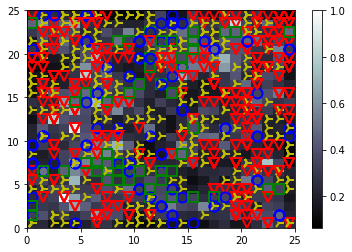

In [153]:
som3 = MiniSom(x = 25, y = 25, input_len = 6, sigma = 1.0, learning_rate = 0.5)
som3.random_weights_init(x_train)
som3.train_random(data = x_train, num_iteration = 100)
suso3 = supervisedSom(som2, x_train, y_train)

label3= suso3.visualSom()

In [154]:
propa3 = suso3.propabilitySom()

taggings3 = suso3.taggingSom()

In [155]:
predicted_y3 = [suso3.predict(instance) for instance in x_test]

from sklearn.metrics import classification_report

print (classification_report(y_test, predicted_y3, target_names=['0','1', '2', '3']))

             precision    recall  f1-score   support

          0       0.91      0.96      0.93       229
          1       0.93      0.84      0.88        63
          2       0.45      0.70      0.55        33
          3       0.89      0.77      0.82       168

avg / total       0.88      0.86      0.86       493



In [156]:
mapping1 = som1.win_map(x_train)
mapping2 = som2.win_map(x_train)
mapping3 = som3.win_map(x_train)

In [157]:
result = np.array([])
for sample in x_test:
    pos1 = suso1.find_closest(sample)
    pos2 = suso2.find_closest(sample)
    pos3 = suso3.find_closest(sample)
    l1 = len(mapping1[pos1])
    l2 = len(mapping2[pos2])
    l3 = len(mapping3[pos3])
#     (pro1, pro2, pro3, pro4) = ((l1*propa[pos1]))
    pro1 = (l1*propa1[0, pos1[0], pos1[1]] + l2*propa2[0, pos2[0], pos2[1]] + l3*propa3[0, pos3[0], pos3[1]])/(l1+l2+l3)
    pro2 = (l1*propa1[1, pos1[0], pos1[1]] + l2*propa2[1, pos2[0], pos2[1]] + l3*propa3[1, pos3[0], pos3[1]])/(l1+l2+l3)
    pro3 = (l1*propa1[2, pos1[0], pos1[1]] + l2*propa2[2, pos2[0], pos2[1]] + l3*propa3[2, pos3[0], pos3[1]])/(l1+l2+l3)
    pro4 = (l1*propa1[3, pos1[0], pos1[1]] + l2*propa2[3, pos2[0], pos2[1]] + l3*propa3[3, pos3[0], pos3[1]])/(l1+l2+l3)
    tmp = np.argmax(np.array([pro1, pro2, pro3, pro4]))
    result = np.append(result, tmp)

In [158]:
from sklearn.metrics import classification_report

print (classification_report(y_test, result, target_names=['0','1', '2', '3']))

             precision    recall  f1-score   support

          0       0.96      0.95      0.96       229
          1       0.88      0.90      0.89        63
          2       0.49      0.67      0.56        33
          3       0.90      0.85      0.87       168

avg / total       0.90      0.89      0.89       493

